In [19]:
import pandas as pd
import numpy as np
import lifelines
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter, WeibullAFTFitter
from lifelines import AalenAdditiveFitter, AalenJohansenFitter, BreslowFlemingHarringtonFitter, CRCSplineFitter, CoxPHFitter, CoxTimeVaryingFitter, ExponentialFitter, GeneralizedGammaFitter, GeneralizedGammaRegressionFitter, KaplanMeierFitter, LogLogisticAFTFitter, LogLogisticFitter, LogNormalAFTFitter, LogNormalFitter, MixtureCureFitter, NelsonAalenFitter, PiecewiseExponentialFitter, PiecewiseExponentialRegressionFitter, SplineFitter, WeibullAFTFitter, WeibullFitter

In [3]:
telco = pd.read_csv("telco.csv")

In [4]:
telco

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


 Build ATF models with all the available distributions

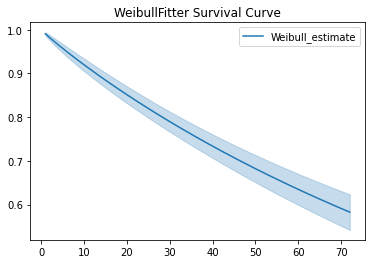

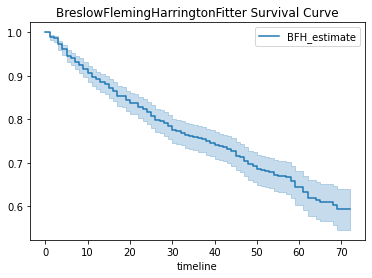

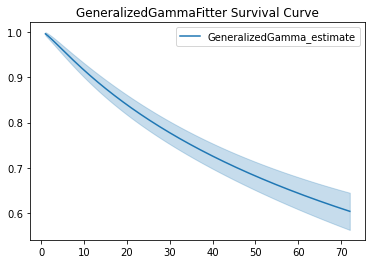

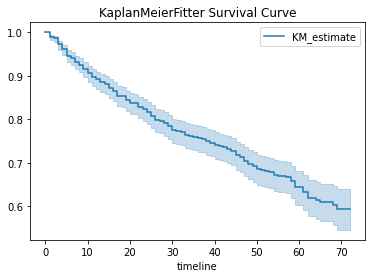

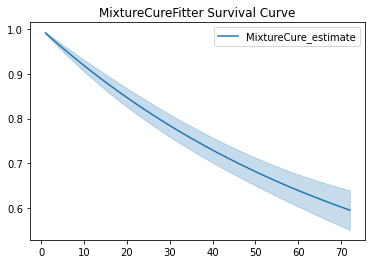

C:\Users\Gor Mkrtchyan\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:1011: ApproximationWarning: 
The Hessian for PiecewiseExponentialFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


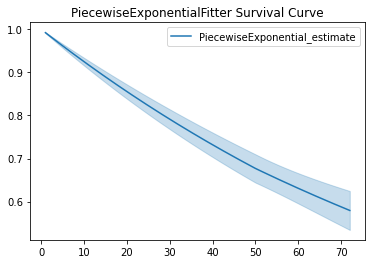

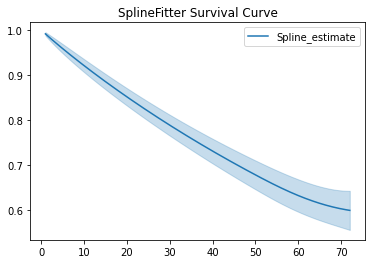

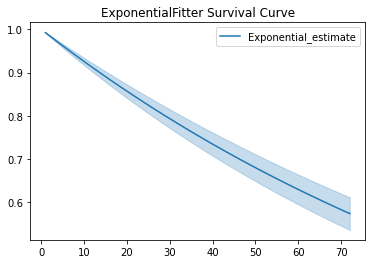

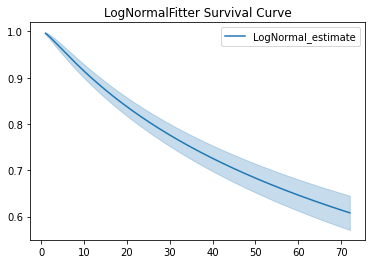

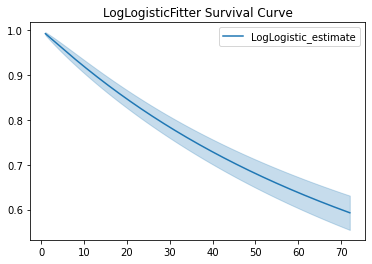

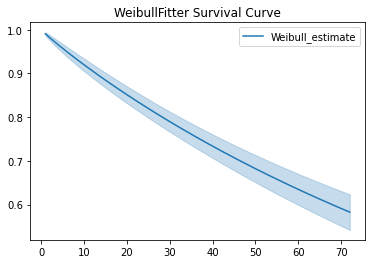

In [5]:
time_column = "tenure"
event_column = "churn"

telco[event_column] = telco[event_column].map({'Yes': 1, 'No': 0})

# Create ATF models with different distributions
models = [
    WeibullFitter(),
    BreslowFlemingHarringtonFitter(),
    GeneralizedGammaFitter(),
    KaplanMeierFitter(),
    MixtureCureFitter(base_fitter=ExponentialFitter()),
    PiecewiseExponentialFitter(breakpoints=[50, 100, 150]),
    SplineFitter(knot_locations=[50, 100, 150]),
    ExponentialFitter(),
    LogNormalFitter(),
    LogLogisticFitter(),
    WeibullFitter()
]

#  Visualize all the curves: one plot for all
for model in models:
    model.fit(durations=telco[time_column], event_observed=telco[event_column])
    model.plot_survival_function()
    plt.title(f"{model._class_name} Survival Curve")
    plt.show()

In [6]:
# Compare models using AIC
print("Model Comparison AIC:")
for model in models:
    try:
        aic = model.AIC_
        print(f"{model._class_name}: {aic}")
    except AttributeError:
        print(f"{model._class_name} does not have AIC.")

# Compare models using BIC
print("\nModel Comparison BIC:")
for model in models:
    try:
        bic = model.BIC_
        print(f"{model._class_name}: {bic}")
    except AttributeError:
        print(f"{model._class_name} does not have BIC.")

Model Comparison AIC:
WeibullFitter: 3216.8611706815464
BreslowFlemingHarringtonFitter does not have AIC.
GeneralizedGammaFitter: 3211.0611993443213
KaplanMeierFitter does not have AIC.
MixtureCureFitter: 3215.4518698889233
PiecewiseExponentialFitter: 3221.7564062888096
SplineFitter: 3220.766960908505
ExponentialFitter: 3215.9608134637247
LogNormalFitter: 3209.0351474316735
LogLogisticFitter: 3214.4154757933375
WeibullFitter: 3216.8611706815464

Model Comparison BIC:
WeibullFitter: 3226.676681239511
BreslowFlemingHarringtonFitter does not have BIC.
GeneralizedGammaFitter: 3225.7844651812675
KaplanMeierFitter does not have BIC.
MixtureCureFitter: 3225.2673804468877
PiecewiseExponentialFitter: 3241.387427404738
SplineFitter: 3235.4902267454513
ExponentialFitter: 3220.868568742707
LogNormalFitter: 3218.850657989638
LogLogisticFitter: 3224.230986351302
WeibullFitter: 3226.676681239511


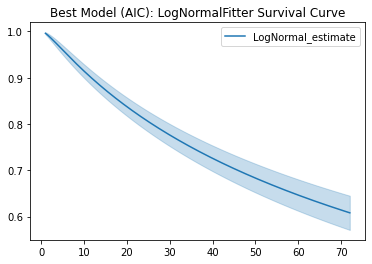

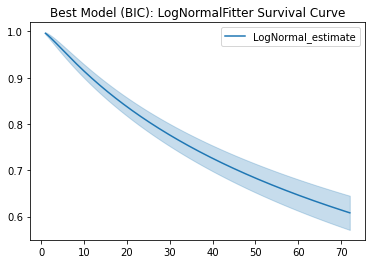

In [7]:
# Find models with available AIC
models_with_aic = [model for model in models if hasattr(model, 'AIC_')]

# Find models with available BIC
models_with_bic = [model for model in models if hasattr(model, 'BIC_')]

best_model_aic = min(models_with_aic, key=lambda model: model.AIC_)
best_model_aic.plot_survival_function()
plt.title(f"Best Model (AIC): {best_model_aic._class_name} Survival Curve")
plt.show()

best_model_bic = min(models_with_bic, key=lambda model: model.BIC_)
best_model_bic.plot_survival_function()
plt.title(f"Best Model (BIC): {best_model_bic._class_name} Survival Curve")
plt.show()

 ##### Which model would you use as a decision maker (think about other factors apart from the above comparisons)

Given that the LogNormal model had the lowest AIC and BIC in our case, and it aligns with the assumptions and interpretability considerations, it seems like a reasonable choice.

 Keep significant features


In [16]:
time_column = "tenure"
event_column = "churn"

# Selecting features
selected_features = ['age', 'tenure', 'income', 'marital', 'internet']

# Encode categorical variables
telco_encoded = pd.get_dummies(telco, columns=['region', 'ed', 'marital', 'internet', 'custcat', 'retire', 'gender', 'voice', 'forward'], drop_first=True)

# Create the AFT model
aft_model = WeibullAFTFitter()
aft_model.fit(telco_encoded, duration_col=time_column, event_col=event_column)

coefficients = aft_model.summary
threshold = 0.1

# Keep significant features
significant_features = coefficients[coefficients['p'] < threshold].index

# Display significant features
print("Significant Features:")
print(significant_features)

Significant Features:
MultiIndex([('lambda_',                              'ID'),
            ('lambda_',                         'address'),
            ('lambda_',                             'age'),
            ('lambda_',               'custcat_E-service'),
            ('lambda_',            'custcat_Plus service'),
            ('lambda_',           'custcat_Total service'),
            ('lambda_', 'ed_Did not complete high school'),
            ('lambda_',           'ed_High school degree'),
            ('lambda_',                 'ed_Some college'),
            ('lambda_',                    'internet_Yes'),
            ('lambda_',               'marital_Unmarried'),
            ('lambda_',                       'voice_Yes'),
            ('lambda_',                       'Intercept'),
            (   'rho_',                       'Intercept')],
           names=['param', 'covariate'])


#### Calculate CLV per customer based on the final model

In [31]:
# Predicting survival probabilities for each customer
predicted_survival = aft_model.predict_survival_function(telco_encoded.drop(columns=['churn', 'tenure']))

if isinstance(predicted_survival, pd.DataFrame):
    telco_encoded['predicted_survival'] = predicted_survival.iloc[:, 0]
else:
    telco_encoded['predicted_survival'] = predicted_survival

# Calculating expected lifetime
telco_encoded['expected_lifetime'] = aft_model.predict_expectation(telco_encoded.drop(columns=['churn', 'tenure']))

telco_encoded['CLV'] = telco_encoded['expected_lifetime']

print(telco_encoded[['ID', 'CLV']])

       ID         CLV
0       1   87.942776
1       2  180.482637
2       3  974.015547
3       4   74.009140
4       5  189.316786
..    ...         ...
995   996   36.874583
996   997   28.140035
997   998  651.329821
998   999  164.350316
999  1000   79.447875

[1000 rows x 2 columns]


#### Explore CLV within different segments.

In [32]:
# Group by gender and custcat
segmented_clv = telco_encoded.groupby(['gender_Male', 'custcat_Total service']).agg({
    'ID': 'count',
    'CLV': 'mean'
}).reset_index()

segmented_clv.columns = ['Gender', 'Customer Category', 'Customer Count', 'Average CLV']

print(segmented_clv)

   Gender  Customer Category  Customer Count  Average CLV
0       0                  0             396   240.467741
1       0                  1             121   158.564144
2       1                  0             368   225.494431
3       1                  1             115   136.697904


In [35]:
# Group by maritial status
segmented_clv = telco_encoded.groupby('marital_Unmarried').agg({
    'ID': 'count',
    'CLV': 'mean'
}).reset_index()

segmented_clv.columns = ['Marital Status', 'Customer Count', 'Average CLV']

print(segmented_clv)

   Marital Status  Customer Count  Average CLV
0               0             495   242.933554
1               1             505   183.884330


### Report

During the analysis we have identified key factors influencing the risk of churn. The coefficients of the survival model provide insights into these factors. For instance, subscribers with higher education levels, those with internet access, and customers in the 'Total Service' category exhibit lower churn risk. 

By segmenting our customer base, we discovered interesting patterns. Male subscribers in the 'Total Service' category, for example, have a lower average churn risk compared to their counterparts. Similarly, unmarried customers tend to show slightly higher churn risk compared to their married counterparts.

Valuable segments, in our context, refer to groups with lower churn risk and higher customer lifetime value (CLV). Based on our findings, targeting customers with higher education, internet access, and those subscribed to the 'Total Service' category might be most effective.

Assuming our data represents the entire population, our annual retention budget could be optimized by focusing on at-risk subscribers.

For enhanced retention, I think we would need more data and further analysis on customer interactions to better understand and address specific customer needs.